# Clustering
- Clustering is defined as the process of dividing data into groups that show similar characteristics within a dataset.
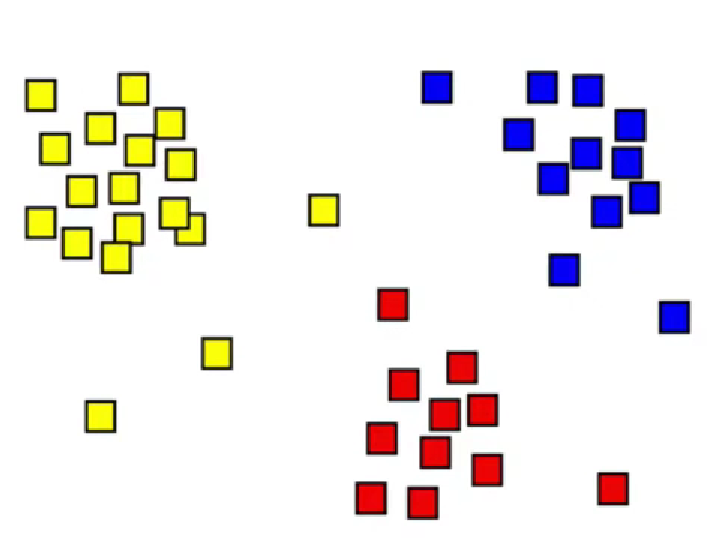
- It is an unsupervised learning method.
## Content:
1. K-Means Clustering
    - What is K-Means Clustering?
    - Creating a Data Set
    - Choosing the K Value
    - Training and Testing the K-Means Clustering Algorithm
2. Hierarchical Clustering
    - What is Hierarchical Clustering?
    - Creating a Data Set
    - Dendrogram Display
    - Training and Testing the Hierarchical Clustering Algorithm

## K-Means Clustering
### What is K-Means Clustering?
- K-Means Clustering is the partitioning of a dataset consisting of N data objects into K clusters, given K as an input parameter.
- K-Means is one of the most commonly used clustering algorithms. It is easy to implement and can cluster large-scale data quickly and efficiently.
- The K-Means algorithm attempts to identify K clusters that will minimize the squared error.
- The algorithm consists of 4 basic steps:
    1. Determining the cluster centers
    2. Clustering the data based on their distances from the centers
    3. Determining new centers based on the clustering or moving the old centers to the new centers
    4. Repeating steps 2 and 3 until convergence is achieved
    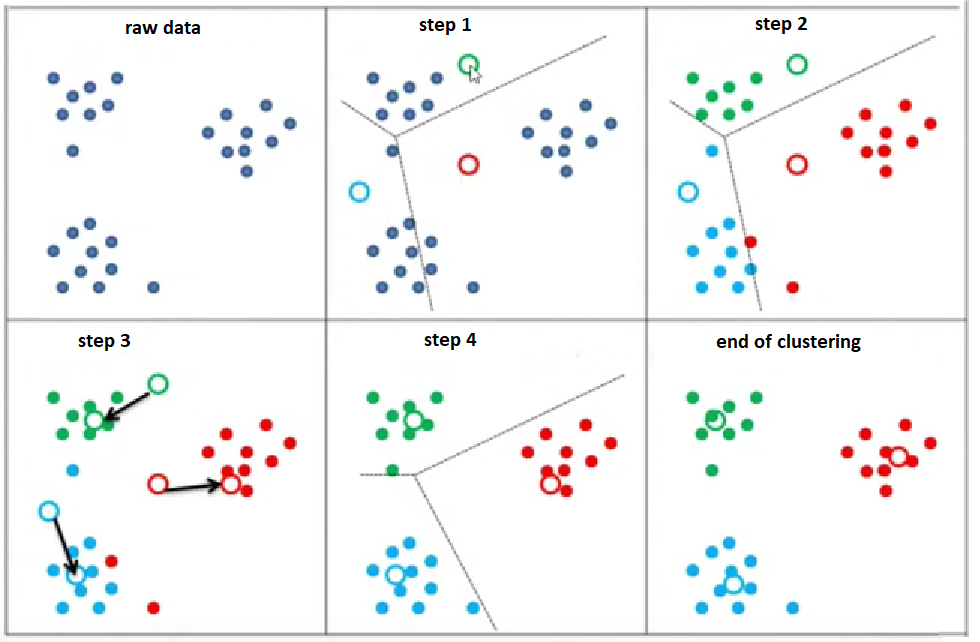

### Creating a Data Set
- In this section, we will create the data necessary to train the K-Means clustering algorithm.
- The data will contain 3 distinct clusters.

In [7]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# create dataset
# cluster 1
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

# cluster 2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# cluster 3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

x = np.concatenate((x1,x2,x3), axis = 0)
y = np.concatenate((y1,y2,y3), axis = 0)

dct = {'x' : x, 'y' : y}

data = pd.DataFrame(dct)
data.head()

,x,y
0,27.189187,25.729100
1,24.204063,24.984828
2,16.924837,23.506560
3,20.509013,24.107533
4,30.646362,20.830538


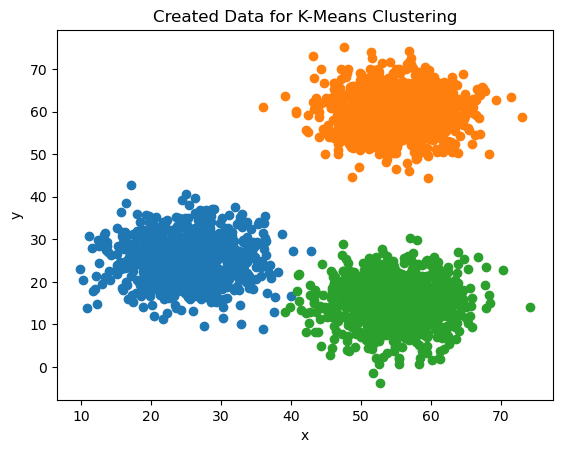

In [10]:
plt.figure()
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3, y3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Created Data for K-Means Clustering')
plt.show()

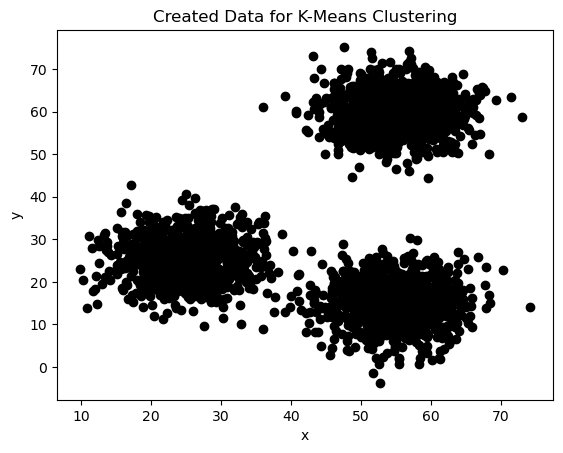

In [11]:
# k-means will see the data like this
plt.figure()
plt.scatter(x1, y1, color = 'black')
plt.scatter(x2, y2, color = 'black')
plt.scatter(x3, y3, color = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Created Data for K-Means Clustering')
plt.show()

### Choosing the K Value
- We will use elbow method for choose K value
- According to this method, the most suitable k value is the K value in the region where the elbow appearance occurs.
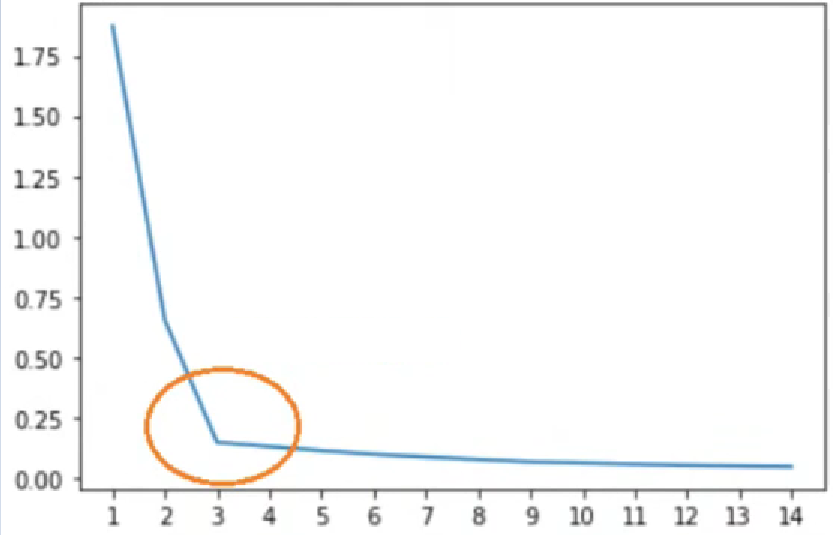

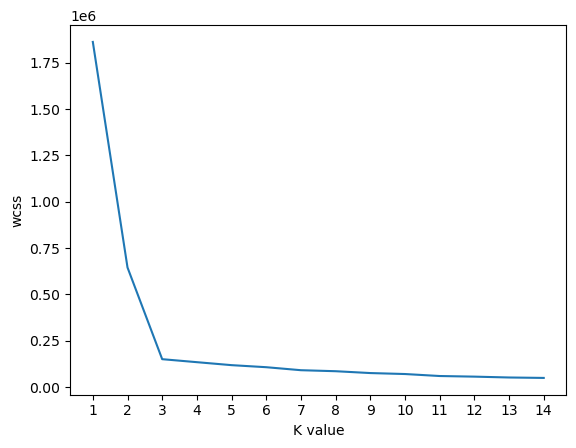

In [12]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.figure()
plt.plot(range(1, 15), wcss)
plt.xticks(range(1, 15))
plt.xlabel('K value')
plt.ylabel('wcss')
plt.show()

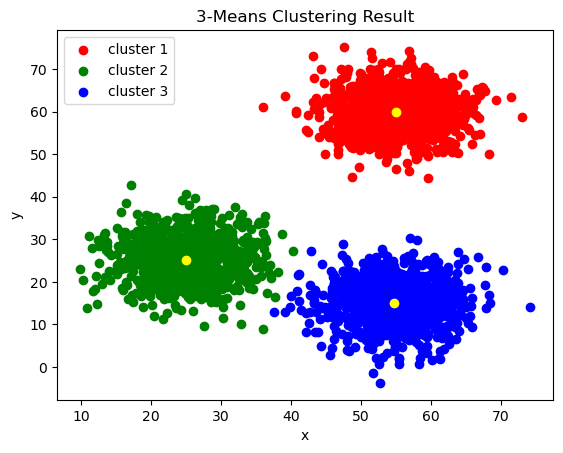

In [14]:
k_mean = KMeans(n_clusters = 3)
clusters = k_mean.fit_predict(data)

data['label'] = clusters

plt.figure()
plt.scatter(data.x[data.label == 0], data.y[data.label == 0], color = 'red', label = 'cluster 1')
plt.scatter(data.x[data.label == 1], data.y[data.label == 1], color = 'green', label = 'cluster 2')
plt.scatter(data.x[data.label == 2], data.y[data.label == 2], color = 'blue', label = 'cluster 3')
plt.scatter(k_mean.cluster_centers_[:,0], k_mean.cluster_centers_[:,1], color = 'yellow')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('3-Means Clustering Result')
plt.show()

## Hierarchical Clustering
### What is Hierarchical Clustering?
- Hierarchical clustering is a clustering analysis method that aims to create a cluster hierarchy.
- Hierarchical clustering strategies are generally divided into two types:
    1. Agglomerative: This is a "bottom-up" approach; each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
    2. Divisive: This is a "top-down" approach; all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.
    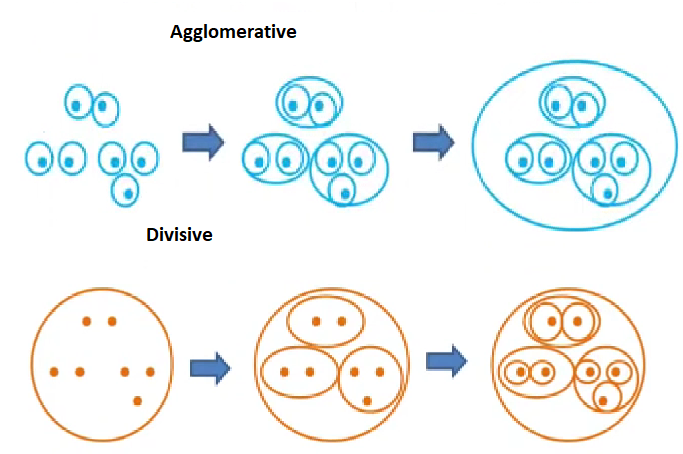
- Dendrogram
    - A diagram that represents a tree.
    - This diagrammatic representation is often used in different contexts: in hierarchical clustering, it shows the arrangement of the clusters produced by the corresponding analyses.
    - In computational biology, it shows the clustering of genes or samples, sometimes on the edges of heat maps.
    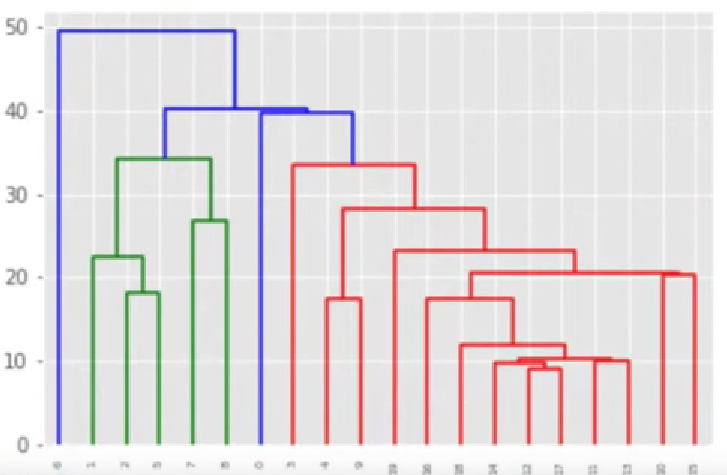

### Creating a Data Set
- In this section, we will create the data necessary to train the Hierarchical clustering algorithm.
- The data will contain 3 distinct clusters.
- It will be similar to what we did with K-Means

In [17]:
# create dataset
# cluster 1
x1 = np.random.normal(25,5,20)
y1 = np.random.normal(25,5,20)

# cluster 2
x2 = np.random.normal(55,5,20)
y2 = np.random.normal(60,5,20)

# cluster 3
x3 = np.random.normal(55,5,20)
y3 = np.random.normal(15,5,20)

x = np.concatenate((x1,x2,x3), axis = 0)
y = np.concatenate((y1,y2,y3), axis = 0)

dct = {'x' : x, 'y' : y}

data = pd.DataFrame(dct)
data.head()

,x,y
0,31.141086,30.582675
1,18.185118,28.180087
2,20.363691,24.945358
3,29.785563,28.381950
4,22.927638,32.573843


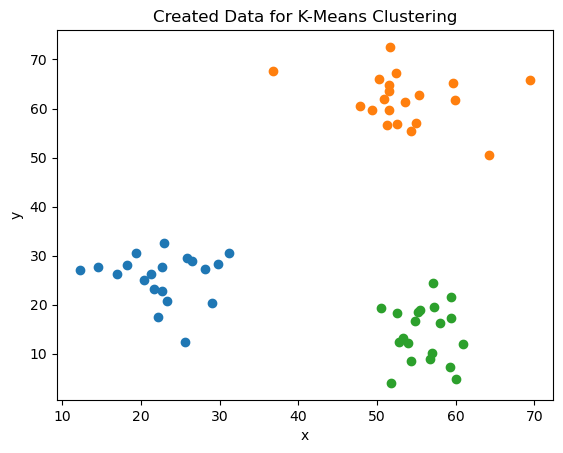

In [18]:
plt.figure()
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3, y3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Created Data for K-Means Clustering')
plt.show()

### Dendogram Display

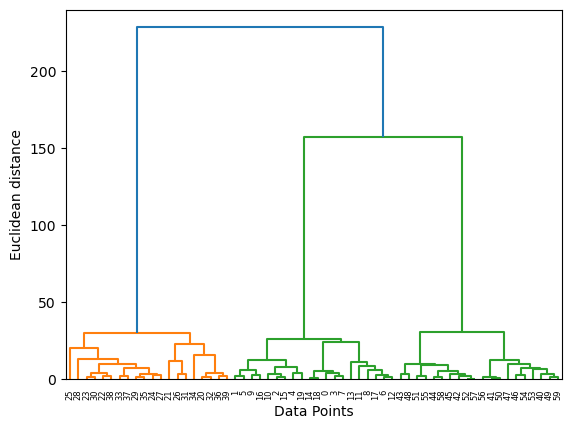

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data, method = 'ward')
dendrogram(merg, leaf_rotation = 90)
plt.xlabel('Data Points')
plt.ylabel('Euclidean distance')
plt.show()

### Training and Testing the Hierarchical Clustering Algorithm

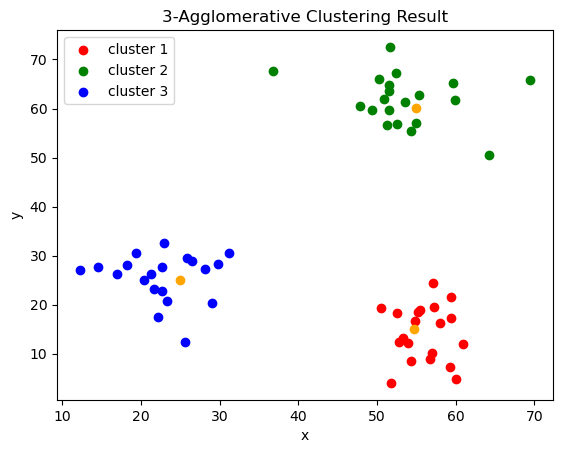

In [24]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
cluster = hierarchical_cluster.fit_predict(data)

data['label'] = cluster

plt.figure()
plt.scatter(data.x[data.label == 0], data.y[data.label == 0], color = 'red', label = 'cluster 1')
plt.scatter(data.x[data.label == 1], data.y[data.label == 1], color = 'green', label = 'cluster 2')
plt.scatter(data.x[data.label == 2], data.y[data.label == 2], color = 'blue', label = 'cluster 3')
plt.scatter(k_mean.cluster_centers_[:,0], k_mean.cluster_centers_[:,1], color = 'orange')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('3-Agglomerative Clustering Result')
plt.show()